# Este paso sirve para detectar por inspección visual canales que tengan muchos artificios
La deteccion se hace 

1) Mediante observación del grafico de todos los LFPs

2) Mediante observacion de la distribucion de las derivadas del LFP (diferencial)

3) Finalmente sustrae el promedio de los canales válidos de cada canal, por lo tanto, cada canal queda referenciado al promedio

In [1]:
%matplotlib notebook
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import signal
#from tqdm import tqdm

In [2]:
# colocar la ruta y el nombre del archivo pickle generado con el codigo 01_ObtenerLFP

# RAT MILO - CONTROL
#fname = 'Raw_LFP_RAT02_SP_7_2017_01_11_18_46_49'
#ruta ='/home/romulo/DATA/Carolina/R02/RAT02_SP_7_2017_01_11_18_46_49/'

# RAT C14 ALEX
fname = 'Decimated_LFP_CA_EC03_C14'
ruta = '/home/cmanalisis/1_SergioEhijo/Ratas/C14_Alex/Pickles/'
lfp = pickle.load(open( ruta+fname+'.pickle', "rb" ) )

In [3]:
lfp

,Channel,Area,OriginalSampleRate,SampleRate,Use,Timestamps at original sample rate,LFP
0,CH1,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[51.37752601122467, -10.526960736330672, -72.1..."
1,CH10,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[70.93957420784857, 16.673253228918906, -42.16..."
2,CH11,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[44.495184086399235, -27.106389529304103, -88...."
3,CH12,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[52.666674489521135, -1.3568564253986495, -49...."
4,CH13,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-199.5825493214687, -254.4849752550085, -285...."
5,CH14,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[16.82598708441508, -25.444716055999727, -70.5..."
6,CH15,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[15.68852975619929, -52.76454331033246, -116.7..."
7,CH16,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[29.355502898588338, -10.392005701847994, -54...."
8,CH17,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[100.12595196680594, 41.22518023977057, -16.41..."
9,CH18,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[104.91186887579013, 49.64741942961504, -6.798..."


<IPython.core.display.Javascript object>


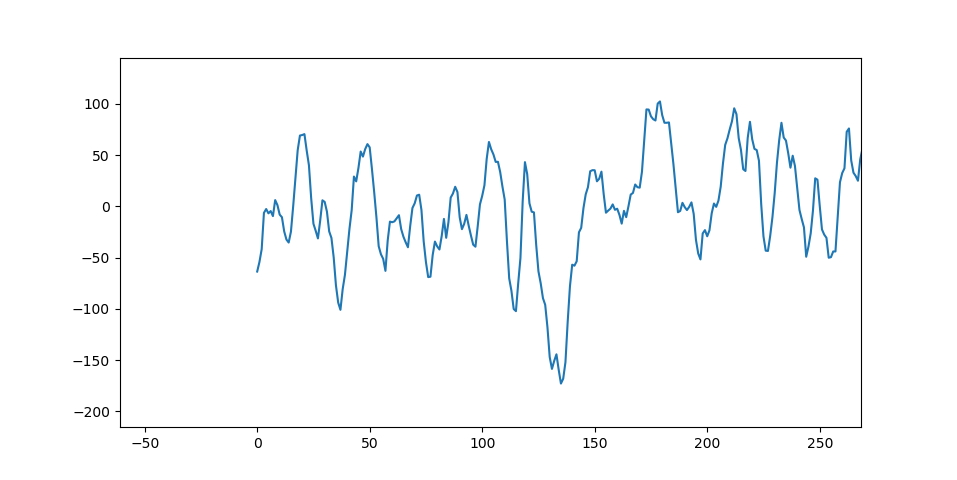

In [3]:
ad = lfp.LFP[0][50000:60000]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)

## Seleccionar los canales a no usar, primero graficar los lfps en el tiempo y la distribucion de las diferenciales

### 1) graficar todos los lfps en el tiempo 

In [ ]:
# Grafica todos los canales
N = 2 # ORDEN DEL FILTRO
#sr
sampleRate = lfp.SampleRate[0]
nyq = sampleRate/2.0
f1 = 0.1 # FRECUENCIAS DE CORTE
f2 = 75.0 # FRECUENCIAS DE CORTE
# band pass freqs expressed as Nyquist
Wn = np.array([f1/nyq, f2/nyq])
# design parameters for the butter filter
#Butter es un filtro pasabanda Butterworth. N es el orden del filtro, Wn el rango, analog se elige Falso
# para obtener un filtro digital. b es el denominador y a el numerador.  
b,a = signal.butter(N, Wn, btype='bandpass', analog=False)

#1) graficar todos los lfps en el tiempo
bar = 1000
fig, ax = plt.subplots()
#sampleRate = lfp.SampleRate[0]
aux = len(lfp.LFP[0])
#numpy.arange([start, ]stop, [step, ]
t = np.arange(1/sampleRate,aux/sampleRate+1/sampleRate,1/sampleRate)

for i in range(0,len(lfp)):
    #Filtfilt is a filter that doesnt cause any phase distortions. padlen length of padding vector. None default
    x=signal.filtfilt(b, a, lfp.LFP[i], padlen=None) # with filter
    #x = lfp.LFP[i] # no filter
    ax.plot(t,x+bar*i)
    if i == 0:
        lowerlim = min(lfp.LFP[i]+bar*i)
    if i == len(lfp)-1:
        upperlim = max(lfp.LFP[i]+bar*i)
i = i+1
#ax.plot(t,average_lfp+bar*i)
ax.set_yticks(range(0,(i+1)*bar,bar))
ax.set_yticklabels(lfp.Area+lfp.Channel)
ax.set_xlim([t[0],t[-1]])
ax.set_ylim(lowerlim,upperlim)
plt.tight_layout()
#plt.savefig('RR01_All_Channels.png', bbox_inches='tight')
#plt.close('all')

 ### 2) graficar las lfps por area

In [ ]:
# Grafica por area
N = 2 # ORDEN DEL FILTRO
sr = lfp.SampleRate[0]
nyq = sr/2.0
f1 = 0.1 # FRECUENCIAS DE CORTE
f2 = 75.0 # FRECUENCIAS DE CORTE
# band pass freqs expressed as Nyquist
Wn = np.array([f1/nyq, f2/nyq])
# design parameters for the butter filter
b,a = signal.butter(N, Wn, btype='bandpass', analog=False)

bar = 1000

sampleRate = lfp.SampleRate[0]
aux = len(lfp.LFP[0])
t = np.arange(1/sampleRate,aux/sampleRate+1/sampleRate,1/sampleRate)


UniqAreas=np.unique(lfp.Area.tolist())
for i in UniqAreas:
    fig, ax = plt.subplots()
    ind = np.where(lfp.Area==i)
    ind=ind[0]
    c=0
    #print i
    yticklabels = []
    for j in ind:
        print (j)
        #x=signal.filtfilt(b, a, lfp.LFP[j], padlen=None) # with filter
        x = lfp.LFP[j] # no filter
        ax.plot(t,x+bar*c)
        yticklabels.append(lfp.Channel[j]+'-'+lfp.Area[j])
        c=c+1
    ax.set_yticks(range(0,(c+1)*bar,bar))
    ax.set_yticklabels(yticklabels)
    ax.set_xlim([t[0],t[-1]])
    #ax.set_ylim(lowerlim,upperlim)
    ax.set_title(i)
    #plt.savefig('RR01_By_Area_'+str(UniqAreas)+'.png', bbox_inches='tight')
plt.tight_layout()

### 3) Ver distribución de derivadas 

In [ ]:
# 2)Grafica la distribucion de la derivada de la señal de LFP por canal
b = 1000
fig, ax_array = plt.subplots(nrows=8,ncols=8)
for i in range(0,8):
    for j in range(0,8):
        ax = ax_array[i,j]
        if i*8+j < len(lfp):
            aux = lfp.LFP[i*8+j]
            ax.hist(np.diff(aux),bins=b, range =[-1000, 1000])
            ax.set_title(lfp.Channel[i*8+j])
            ax.set_ylim(0,20)  

### Put here channels you are not going to use, those will be removed from the data frame

In [4]:
#### Para ALEX
Channels2Remove=['CH36','CH37', 'CH38', 'CH39', 'CH40', 'CH41', 'CH42', 'CH43', 'CH44', 'CH45',
                 'CH52','CH53', 'CH54', 'CH55', 'CH56', 'CH57', 'CH58', 'CH59', 'CH60', 'CH61']
### Para Control Salino
#Channels2Remove=[]

### Identify the indices of the channels you want to remove and remove the rows from the dataframe

In [5]:
indices = []
for i in Channels2Remove:
    ind = np.where(lfp.Channel==i)
    ind = int(ind[0])
    indices.append(ind)
original_len= len(lfp)
lfp.drop(indices,axis=0,inplace=True)
lfp.reset_index(inplace=True)
lfp.drop('index',axis=1,inplace=True)
print (original_len)
print (len(lfp))

64
44


In [6]:
lfp

,Channel,Area,OriginalSampleRate,SampleRate,Use,Timestamps at original sample rate,LFP
0,CH1,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[51.37752601122467, -10.526960736330672, -72.1..."
1,CH10,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[70.93957420784857, 16.673253228918906, -42.16..."
2,CH11,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[44.495184086399235, -27.106389529304103, -88...."
3,CH12,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[52.666674489521135, -1.3568564253986495, -49...."
4,CH13,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-199.5825493214687, -254.4849752550085, -285...."
5,CH14,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[16.82598708441508, -25.444716055999727, -70.5..."
6,CH15,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[15.68852975619929, -52.76454331033246, -116.7..."
7,CH16,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[29.355502898588338, -10.392005701847994, -54...."
8,CH17,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[100.12595196680594, 41.22518023977057, -16.41..."
9,CH18,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[104.91186887579013, 49.64741942961504, -6.798..."


### Referenciar (restar) con promedio de cada area

In [8]:
AreaList=lfp.Area.tolist()
UniqAreas=np.unique(AreaList)
for i in UniqAreas:
    ind = np.where(lfp.Area==i)
    ind=ind[0]
    print (ind), (len(ind))
    lfp_array=np.zeros( (len(ind), len(lfp.LFP[0])) ) 
    lfp_array2=np.zeros( (len(ind), len(lfp.LFP[0])) ) 
    c=0
    
    for j in ind:  
        ad =lfp.LFP[j]
        add = ad - np.mean(ad) # demeaning
        lfp_array[c,:]= (add - np.mean(add)) / np.std(add) # z-scoring        
        c=c+1
    average_lfp = np.mean(lfp_array,axis=0)
    
    for j in ind:
        ad =lfp.LFP[j]
        add = ad - np.mean(ad) # demeaning
        lfp.LFP[j] = ((add - np.mean(add)) / np.std(add)) - average_lfp # substracting z-scores

[ 0  4  5  6  7 11 22 29 34]


/home/cmanalisis/anaconda2/envs/py3-env/lib/python3.5/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[27 28 30 31 32]
[ 1  2  3 37 41 42 43]
[ 8  9 10 12 20 21 23 24 25]
[26 33 35 36 38 39 40]
[13 14 15 16 17 18 19]


In [9]:
lfp

,Channel,Area,OriginalSampleRate,SampleRate,Use,Timestamps at original sample rate,LFP
0,CH1,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.4243731944286271, 0.37725204297633624, 0.30..."
1,CH10,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.01396084286772803, 0.05303670903624445, 0...."
2,CH11,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.2181750294183304, -0.3309717955917523, -0...."
3,CH12,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.17107225260010928, -0.10000508720846243, -..."
4,CH13,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-1.6956368124432863, -1.7909654076268176, -1...."
5,CH14,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.1805593781972531, 0.273332439490279, 0.3227..."
6,CH15,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.17381616359727983, 0.07816595091917983, -0...."
7,CH16,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.26869568952051975, 0.37844835472783167, 0.4..."
8,CH17,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.011715186622978324, -0.0007937651668658008,..."
9,CH18,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.04653908577181065, 0.06507085456569905, 0.0..."


### Guardar el dataframe de la lfp referenciada

In [11]:
# save proccessed LFP file

processing = 'referencing to zscored average of electrodes area'
extra = 'CA_EC03_C14'
file2save = ruta+'ZScoredLFP_'+extra+'.pickle'
print (file2save)
answer = input('The file below will be saved. Save?(Y/n):')
if answer == 'n':
    print ('Saving canceled')
elif answer == 'Y':
    print ('Saving file to %s...' % (file2save))
    # Guarda el archivo
    pickle.dump(lfp, open(file2save, "wb" ) ) 
    #pickle.dump([lfp,processing,average_lfp], open(file2save, "wb" ) ) 
else:
    print ('Saving canceled')

/home/cmanalisis/1_SergioEhijo/Ratas/C14_Alex/Pickles/2ZScoredLFP_CA_EC03_C14.pickle
The file below will be saved. Save?(Y/n):Y
Saving file to /home/cmanalisis/1_SergioEhijo/Ratas/C14_Alex/Pickles/2ZScoredLFP_CA_EC03_C14.pickle...
